In [1]:
import tensorflow
import tensorflow.keras as ks
#載入資料、準備資料
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim)#ndim 為 3, 有 3 個軸
print(train_images.shape)#shape 為 60000x28x28 維的 3D 張量 (有 3 個元素)
print(train_images.dtype)#元素的資料型別為 0~255 的整數

3
(60000, 28, 28)
uint8


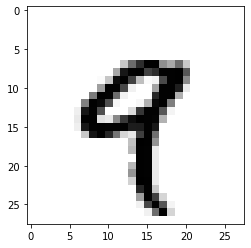

In [2]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

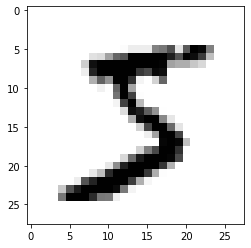

In [3]:
digit = train_images[0]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [31]:
#試試看基本的類神經網路
# 舊版是這樣
#from keras import models
#from keras import layers
#from keras.datasets import mnist
#from keras.utils import to_categorical

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#- 備資料
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images[0].shape)
print(train_images[0][10])


#- 整理資料
train_images = train_images.reshape((60000, 28 * 28))  #reshape 是 NumPy 陣列的 method
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print(train_images[0].shape)
print(train_images[0])

(28, 28)
[  0   0   0   0   0   0   0   0   0  14   1 154 253  90   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
(784,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

In [32]:
#- 建立layer, model
network = models.Sequential()
network.add(layers.Dense(10000, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [33]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [34]:
network

In [35]:
#- 準備標籤
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#- training
network.fit(train_images, train_labels, epochs=5, batch_size=128)
#- testing
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 67s 141ms/step - loss: 0.2296 - accuracy: 0.9331
Epoch 2/5
469/469 [==============================] - 66s 141ms/step - loss: 0.0834 - accuracy: 0.9751
Epoch 3/5
469/469 [==============================] - 81s 173ms/step - loss: 0.0585 - accuracy: 0.9828
Epoch 4/5
469/469 [==============================] - 75s 160ms/step - loss: 0.0450 - accuracy: 0.9870
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.1028 - accuracy: 0.9790
test_acc: 0.9789999723434448
